In [1]:
from UTILITY_quickstart import *

#importedDefaultSettings = loadConfig("setLattice_configs/2024-10-22_oneBunch_baseline.yml")
importedDefaultSettings = loadConfig("setLattice_configs/2024-10-22_oneBunch_baseline2.yml")

In [2]:
#Disable centering
#importedDefaultSettings = importedDefaultSettings | {"centerBC14" : False, "centerBC20" : False, "centerMFFF" : False}
    

In [3]:
csrTF = True
evalElement = "BEGBC20"


inputBeamFilePathSuffix = importedDefaultSettings["inputBeamFilePathSuffix"]
bunchCount = importedDefaultSettings["bunchCount"]
tao = initializeTao(
    inputBeamFilePathSuffix = inputBeamFilePathSuffix,
    
    csrTF = csrTF,
    numMacroParticles=1e5,
    scratchPath = "/tmp",
    randomizeFileNames = True
)

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR on
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using setLattice_configs/defaults.yml
Number of macro particles = 100000.0
Beam created, written to /tmp/beams/activeBeamFile_2462259769299583890.h5, and reinit to tao


In [4]:
trackBeam(tao, trackEnd = "L0BFEND", verbose = True)
PInit = getBeamAtElement(tao, "L0AFEND")

artificialFactor = 1.3
PInit.x = artificialFactor * PInit.x
PInit.px = artificialFactor * PInit.px
PInit.y = artificialFactor * PInit.y
PInit.py = artificialFactor * PInit.py

makeBeamActiveBeamFile(PInit, tao = tao)

Loaded /tmp/beams/activeBeamFile_2462259769299583890.h5
Set track_start = L0AFEND, track_end = L0BFEND
Tracking!
trackBeam() exiting


In [5]:
setLattice(tao, **importedDefaultSettings)

In [6]:
trackBeam(tao, 
          trackEnd = evalElement,
          **importedDefaultSettings,
          verbose = True
         )

Loaded /tmp/beams/activeBeamFile_2462259769299583890.h5
Set track_start = L0AFEND, track_end = BEGBC20
Set track_end = BEGBC14_1
Tracking!
Also setting BC14 energy = 4.5 GeV, from 4.414555258120038 GeV
Beam centered at BEGBC14 written to /tmp/beams/patchBeamFile_2462259769299583890.h5
Loaded /tmp/beams/patchBeamFile_2462259769299583890.h5
Set track_start = BEGBC14_1, track_end = BEGBC20
Tracking!
trackBeam() exiting


In [7]:
PInit = getBeamAtElement(tao, "L0AFEND")
P571 = getBeamAtElement(tao, "PR10571")
P = getBeamAtElement(tao, evalElement)

In [8]:
getBeamAtElement(tao, "PR10571").twiss(plane = "x", fraction = 0.9)

{'alpha_x': -1.8297731824709988,
 'beta_x': 5.134167487739054,
 'gamma_x': 0.8468889863203153,
 'emit_x': 1.6315597096479434e-08,
 'eta_x': 0.00014391270322444816,
 'etap_x': 8.71958135549927e-05,
 'norm_emit_x': 3.931209142631125e-06}

In [9]:
getBeamAtElement(tao, "BEGBC14_1").twiss(fraction = 0.9)

{'alpha_x': -0.6505794840612503,
 'beta_x': 69.89691719581279,
 'gamma_x': 0.02036218079681865,
 'emit_x': 5.687256960753551e-10,
 'eta_x': 0.0006482164267760291,
 'etap_x': -0.00016098754902080822,
 'norm_emit_x': 5.0075899357997835e-06}

In [10]:
getBeamAtElement(tao, "ENDBC14_2").twiss(fraction = 0.9)

{'alpha_x': 0.14101421301250433,
 'beta_x': 6.1024690842243965,
 'gamma_x': 0.16712661616067162,
 'emit_x': 6.605407802628676e-10,
 'eta_x': -0.003696898816670202,
 'etap_x': -0.00031206510777934685,
 'norm_emit_x': 5.812924273170057e-06}

In [11]:
getBeamAtElement(tao, "BEGBC20").twiss(plane = "x", fraction = 0.9)

{'alpha_x': 1.0003108682736193,
 'beta_x': 9.943681260762752,
 'gamma_x': 0.20119528982497373,
 'emit_x': 3.551058343719418e-10,
 'eta_x': 0.0047433059670846595,
 'etap_x': -0.0003493333929909541,
 'norm_emit_x': 6.893097613127528e-06}

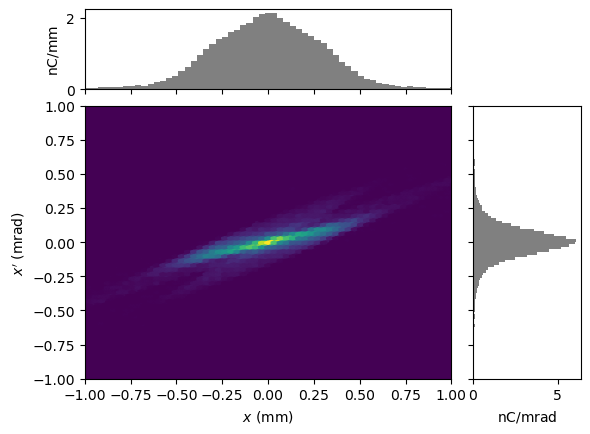

<Figure size 640x480 with 0 Axes>

In [12]:
display(plotMod(P571, 'x', 'xp',  bins=300, xlim = (-0.001, 0.001), ylim = (-0.001, 0.001)))
plt.clf()

In [13]:
getBeamSpecs(P571, targetTwiss = "PR10571")

{'PDrive_median_x': 1.0122263707079188e-07,
 'PDrive_median_y': 2.0593455841288135e-07,
 'PDrive_median_xp': 1.538236561236799e-07,
 'PDrive_median_yp': -1.250733547534963e-07,
 'PDrive_median_energy': 123131805.08857137,
 'PDrive_sigmaSI90_x': 0.0003829155798771834,
 'PDrive_sigmaSI90_y': 0.0002690263673909923,
 'PDrive_sigmaSI90_z': 0.0005745230173079774,
 'PDrive_sigmaSI90_xp': 0.00018687388634049335,
 'PDrive_sigmaSI90_yp': 8.075515487405463e-05,
 'PDrive_sigmaSI90_energy': 105296.67908495238,
 'PDrive_emitSI90_x': 7.773207964249391e-06,
 'PDrive_emitSI90_y': 5.207695600963174e-06,
 'PDrive_norm_emit_x': 3.931209142631125e-06,
 'PDrive_norm_emit_y': 2.871664707043511e-06,
 'PDrive_charge_nC': 1.6000000000000005,
 'PDrive_BMAG_x': 1.0075876566543518,
 'PDrive_BMAG_y': 1.006594146900768,
 'PDrive_sliced_BMAG_x': [2.2389174985254154,
  1.1260046853441557,
  1.0628817852111676,
  1.1012919300537036,
  1.3144911324091044],
 'PDrive_sliced_BMAG_y': [1.303644638276514,
  1.017197190183726

In [14]:
getBeamSpecs(P, targetTwiss = "BEGBC20")

{'PDrive_median_x': 5.0083795194816595e-06,
 'PDrive_median_y': 7.684598581918415e-07,
 'PDrive_median_xp': -4.786127815884193e-06,
 'PDrive_median_yp': -4.922692657761248e-08,
 'PDrive_median_energy': 9918843467.372578,
 'PDrive_sigmaSI90_x': 0.00011318278355723983,
 'PDrive_sigmaSI90_y': 9.480868421099993e-05,
 'PDrive_sigmaSI90_z': 8.21566932468031e-05,
 'PDrive_sigmaSI90_xp': 1.2128382961973006e-05,
 'PDrive_sigmaSI90_yp': 5.575048121523607e-06,
 'PDrive_sigmaSI90_energy': 88456787.58206253,
 'PDrive_emitSI90_x': 1.9160928266658428e-05,
 'PDrive_emitSI90_y': 6.30945856299129e-06,
 'PDrive_norm_emit_x': 6.893097613127528e-06,
 'PDrive_norm_emit_y': 3.769798130625062e-06,
 'PDrive_charge_nC': 1.5982560000000006,
 'PDrive_BMAG_x': 1.1008329208123484,
 'PDrive_BMAG_y': 1.0443565127312917,
 'PDrive_sliced_BMAG_x': [1.8647447453258128,
  1.4535862226935674,
  1.174089571981171,
  1.5339208680961987,
  4.4114241760420025],
 'PDrive_sliced_BMAG_y': [1.5332120471465558,
  1.3831346986059199

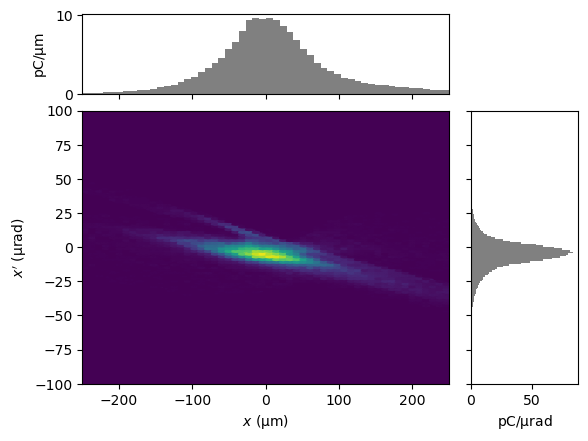

In [15]:
display(plotMod(P, 'x', 'xp',  bins=300, xlim = (-0.25e-3, 0.25e-3), ylim = (-0.1e-3, 0.1e-3)))
plt.clf()